# Support Vector Machines

Support Vector Machines (SVM) are **supervised learning algorithms** used for **classification and regression** tasks. They work by finding the optimal hyperplane that separates data points of different classes with the **maximum margin**. 

SVMs are **effective in high-dimensional spaces** and can use **kernel functions** to handle non-linear relationships.

<img src="https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png"/>

## 1. SVC - Support Vector Classifier

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import sklearn SVM libraries

from sklearn.svm import SVC
from sklearn.svm import SVR

#import other sklearn libraries for data preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
#read the dataset
df = pd.read_csv('2_2_admission_basedon_exam_scores_dataset.csv')
df.head()

,exam_1_marks,exam_2_marks,admission_status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Dataset Explanation

This dataset contains information about students' exam scores and their admission status. It has three columns:

- **exam_1_marks**: The score obtained by a student in Exam 1 (float).
- **exam_2_marks**: The score obtained by a student in Exam 2 (float).
- **admission_status**: Indicates whether the student was admitted (1) or not admitted (0) (integer).

Each row represents a student. The goal is typically to predict `admission_status` based on the exam scores, making this a binary classification problem.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   exam_1_marks      100 non-null    float64
 1   exam_2_marks      100 non-null    float64
 2   admission_status  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df.describe()

,exam_1_marks,exam_2_marks,admission_status
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


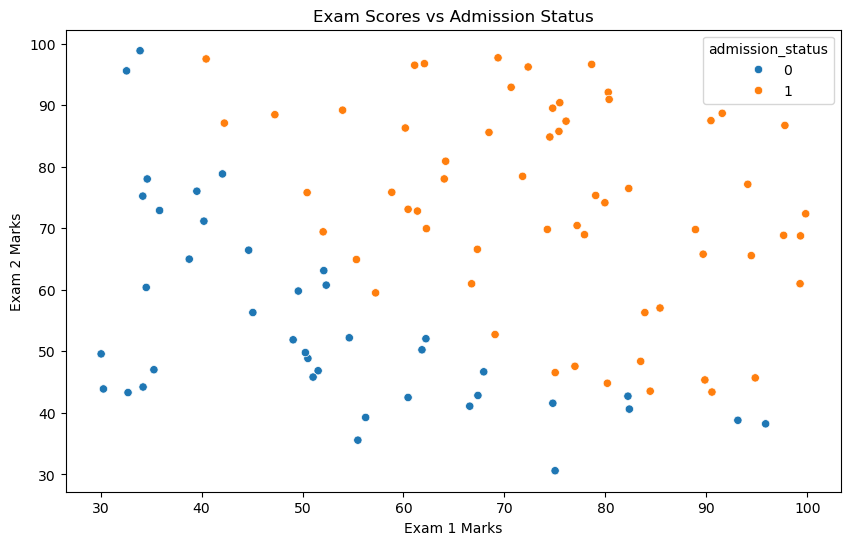

In [ ]:
# see the visualization of the dataset using scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='exam_1_marks', y='exam_2_marks', hue='admission_status')
plt.title('Exam Scores vs Admission Status')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')
plt.show()

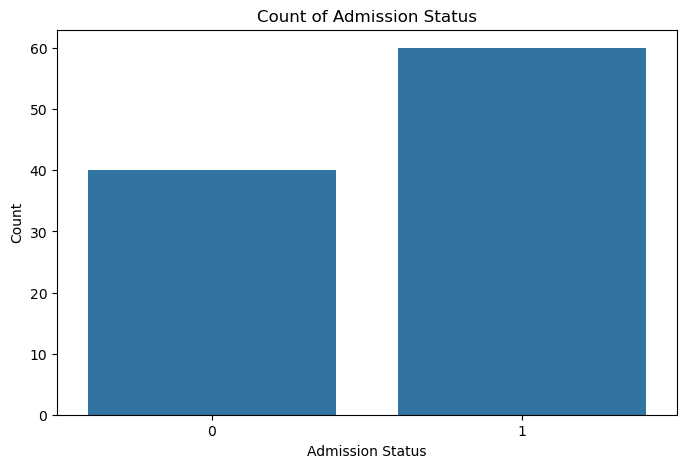

In [14]:
# see the countplot of the admission status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='admission_status')
plt.title('Count of Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('Count')
plt.show()

In [15]:
# X and y split
X = df[['exam_1_marks', 'exam_2_marks']]
y = df['admission_status']


In [16]:
# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [17]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# Crate and train SVM classifier model
model = SVC(kernel='linear')  # You can change the kernel as needed (e.g., 'rbf', 'poly', etc.)
model.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
# predict on the test set
y_pred = model.predict(X_test)

In [22]:
# evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 7  1]
 [ 2 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.91      0.83      0.87        12

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



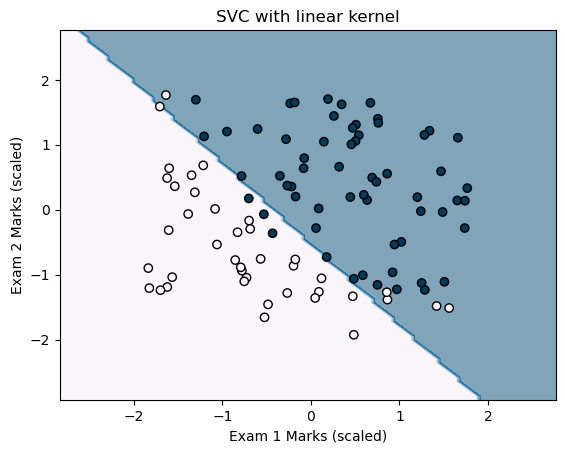

In [23]:
# plot the decision boundary with sklearn SVM
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_scaled,
    response_method="predict",
    cmap=plt.cm.PuBu,
    alpha=0.5,
)
disp.ax_.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=y,
    edgecolor="k",
    cmap=plt.cm.PuBu,
)
disp.ax_.set_title("SVC with linear kernel")
plt.xlabel('Exam 1 Marks (scaled)')
plt.ylabel('Exam 2 Marks (scaled)')
plt.show()

In [38]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

def plot_training_data_with_decision_boundary(kernel, model=None):
    plt.figure(figsize=(10,6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.PuBu, edgecolor='k')
    plt.xlabel('Exam 1 Marks (scaled)')
    plt.ylabel('Exam 2 Marks (scaled)')
    plt.title(f'SVM with {kernel} kernel')

    if model is None:
        model = svm.SVC(kernel=kernel)
        model.fit(X_train, y_train)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # evaluate the model
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 7), cmap=plt.cm.PuBu, alpha=0.5)
    ax.contour(xx, yy, Z, colors='k', levels=[0], linewidths=2)

    plt.show()

Confusion Matrix:
[[ 6  2]
 [ 0 12]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



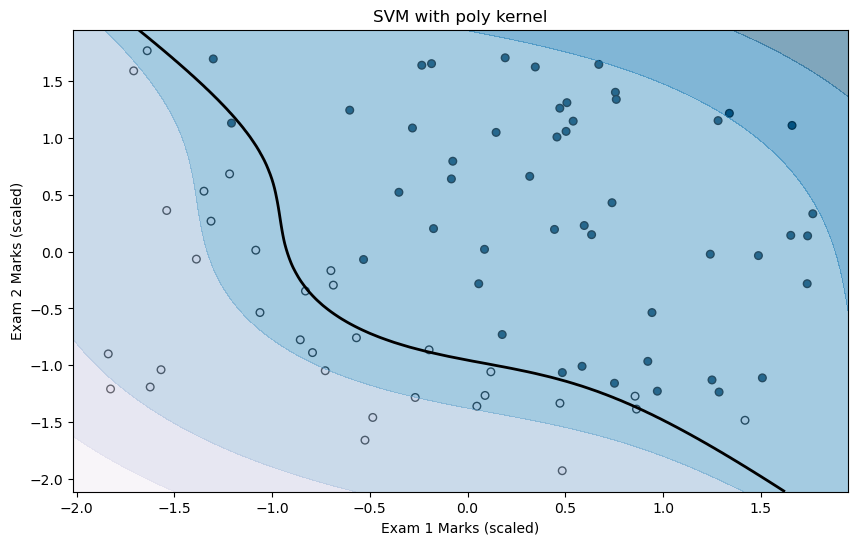

In [44]:
plot_training_data_with_decision_boundary("poly")

In [46]:
# Use hyperparameter tuning to find the best parameters for the SVM model

from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [47]:
# predict on the gird search model
y_pred_grid = grid.predict(X_test)

In [49]:
# evaluate the gird search model
print("Best Parameters from Grid Search:", grid.best_params_)


Best Parameters from Grid Search: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [50]:
# evaluate acoording to the best parameters
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Confusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))


Confusion Matrix for Best Model:
[[ 8  0]
 [ 1 11]]

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



------------------

## Scikit-learn Pipeline

## Scikit-learn Pipeline

The `Pipeline` class in scikit-learn is a tool that allows you to **chain multiple data processing steps and modeling steps together** into a single object. Each step in the pipeline is a tuple containing a name and an estimator (such as a transformer or a model).

### Why do we use Pipeline?

- **Streamlined Workflow:** Pipelines automate the sequence of data transformations and model training, making code cleaner and easier to manage.
- **Reproducibility:** Ensures that the same transformations are applied during both training and prediction.
- **Prevents Data Leakage:** By fitting transformers only on the training data within cross-validation, pipelines help avoid leaking information from the test set.
- **Simplifies Hyperparameter Tuning:** You can tune parameters of all steps in the pipeline using tools like `GridSearchCV`.
- **Consistency:** Guarantees that preprocessing steps are always applied in the correct order.

**Example:**  
A typical pipeline might include scaling features and then fitting an SVM classifier:

```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])
```

This ensures that scaling and classification are always performed together, both during training and prediction.

In [ ]:
# Do it with Scikit-learn with different pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

pipeline1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [53]:
y_pred_pipeline = pipeline1.predict(X_test)
print("Confusion Matrix for Pipeline Model:")
print(confusion_matrix(y_test, y_pred_pipeline))
print("\nClassification Report for Pipeline Model:")
print(classification_report(y_test, y_pred_pipeline))

Confusion Matrix for Pipeline Model:
[[ 7  1]
 [ 2 10]]

Classification Report for Pipeline Model:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.91      0.83      0.87        12

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



In [55]:
param_grid_pipeline = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid_pipeline = GridSearchCV(pipeline1, param_grid_pipeline, cv=5)
grid_pipeline.fit(X_train, y_train)

print("Best parameters:", grid_pipeline.best_params_)

y_pred_pipeline = grid_pipeline.predict(X_test)
print("Confusion Matrix for Pipeline Model:")
print(confusion_matrix(y_test, y_pred_pipeline))
print("\nClassification Report for Pipeline Model:")
print(classification_report(y_test, y_pred_pipeline))

Best parameters: {'svc__C': 100, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Confusion Matrix for Pipeline Model:
[[ 8  0]
 [ 1 11]]

Classification Report for Pipeline Model:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



-----------------

## SVR - Support Vector Regressor

Support Vector Regressor (SVR) is a regression algorithm based on Support Vector Machines. 

It finds a function that best fits the data by maximizing the margin within a specified error tolerance, making it robust to outliers and effective for both linear and non-linear regression tasks using kernel functions.